In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hindi-dataset/hindi_preprocessed_2.csv
/kaggle/input/english-data/english_lemmatized.csv


In [42]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

In [43]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 2 GPU(s) available.
We will use the GPU: Tesla T4


In [44]:
!pip install transformers

In [45]:
import pandas as pd


df0 =  pd.read_csv("/kaggle/input/hindi-dataset/hindi_preprocessed_2.csv")
# df =  df.drop(['Unnamed: 0','_id','task_2'], axis=1)
df0.rename(columns = {'text':'sentence', 'task_1':'label'}, inplace = True)
# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(df0.shape[0]))

Number of training sentences: 4,594



In [46]:
from sklearn.model_selection import train_test_split

X = df0['sentence']
y = df0['label']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create separate DataFrames for train and test data
df = pd.DataFrame({'sentence': X_train, 'label': y_train})
test_df = pd.DataFrame({'sentence': X_test, 'label': y_test})

# Report the number of sentences in train and test sets
print('Number of training sentences: {:,}'.format(df.shape[0]))
print('Number of testing sentences: {:,}'.format(test_df.shape[0]))


Number of training sentences: 3,675
Number of testing sentences: 919


In [47]:
test_df.head()

,sentence,label
3201,के विधायक ने माना कि िल्ली में जनता की दुर्दश...,1
2820,ज़िंदगी और मौत दोनों से डर रहे है बंदे में कुछ...,1
1616,अजीत सिंह के लिए आप का शोक व्यक्त करना बिल्कुल...,1
2696,बड़ी जल्दी ये बात समझ में आ गई जब वो टोंटीचोर...,0
3487,लाशो पर लाशे गिरी तेरी नींद तक ना टूटी :enrage...,1


In [48]:
df['label']

1402    1
1736    0
4438    1
3680    0
1025    1
       ..
4426    0
466     1
3092    0
3772    1
860     0
Name: label, Length: 3675, dtype: int64

In [49]:
df.loc[df.label == 0].sample(5)[['sentence', 'label']]

,sentence,label
2708,बड़ी अजीब कौम है सिख जिस चीज़ की कमी होने पर ल...,0
3287,जानवर जानवर का शिकार करता है इंसान जानवर का शि...,0
1783,हद से ज्यादा ढीठबेशर्म और फूहड़ चिंटुत्व के फे...,0
3110,कमीने कुत्ते भी कोरोना से बच गये,0
1938,चमचों बेशक कोविड से मर जाना लेकिन अगर एक बाप क...,0


In [50]:
# Get the lists of sentences and their labels.
sentences = df.sentence.values
labels = df.label.values

In [51]:
# Get the lists of sentences and their labels.

sentences = df.sentence.values
labels = df.label.values

# Create lists to store valid sentences and corresponding labels
cleaned_sentences = []
cleaned_labels = []

# Remove NaN sentences and corresponding labels
for sent, label in zip(sentences, labels):
    if isinstance(sent, str):
        cleaned_sentences.append(sent)
        cleaned_labels.append(label)

sentences = cleaned_sentences
labels = cleaned_labels

In [52]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [53]:
# Print the original sentence.

print(' Original: ', sentences[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

 Original:    मोन है क्या आपका तेजस्वी हो या सब मोन रखे हुए उनकी पार्टी के मुस्लिम लीडरो का कतल हो रहा है ये चुप तमसा देख रहे हे शाबुद्धीन हों या ाजवादीपार्टीसेआज़मखां या से ीक सबतमसा देखरहे है
Tokenized:  ['म', '##ोन', 'ह', 'कया', 'आ', '##पक', '##ा', 'त', '##ज', '##स', '##वी', 'हो', 'या', 'सब', 'म', '##ोन', 'र', '##ख', 'हए', 'उनकी', 'पारटी', 'क', 'म', '##सल', '##िम', 'ली', '##डर', '##ो', 'का', 'क', '##त', '##ल', 'हो', 'रहा', 'ह', 'य', 'च', '##प', 'त', '##मस', '##ा', 'दख', 'रह', 'ह', 'श', '##ाब', '##दध', '##ीन', 'हो', 'या', 'ा', '##ज', '##वादी', '##पार', '##टी', '##स', '##आ', '##ज', '##म', '##खा', 'या', 'स', 'ी', '##क', 'सब', '##तम', '##सा', 'दख', '##र', '##ह', 'ह']
Token IDs:  [571, 37005, 580, 45731, 533, 94464, 10949, 562, 14256, 12114, 21123, 13465, 12453, 52981, 571, 37005, 573, 21377, 25066, 37888, 81480, 547, 571, 82550, 37120, 94365, 68392, 11231, 11263, 547, 11354, 11468, 13465, 36335, 580, 572, 552, 15674, 562, 49611, 10949, 91329, 29131, 580, 577, 80969, 37057, 48072, 13465,

In [54]:
max_len = 0

# For every sentence...
for sent in sentences:
    # Check if the sentence is not NaN
        # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
        input_ids = tokenizer.encode(sent, add_special_tokens=True)

        # Update the maximum sentence length.
        max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  322


In [55]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )

    # Add the encoded sentence to the list.
    input_ids.append(encoded_dict['input_ids'])

    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2688: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Original:    मोन है क्या आपका तेजस्वी हो या सब मोन रखे हुए उनकी पार्टी के मुस्लिम लीडरो का कतल हो रहा है ये चुप तमसा देख रहे हे शाबुद्धीन हों या ाजवादीपार्टीसेआज़मखां या से ीक सबतमसा देखरहे है
Token IDs: tensor([  101,   571, 37005,   580, 45731,   533, 94464, 10949,   562, 14256,
        12114, 21123, 13465, 12453, 52981,   571, 37005,   573, 21377, 25066,
        37888, 81480,   547,   571, 82550, 37120, 94365, 68392, 11231, 11263,
          547, 11354, 11468, 13465, 36335,   580,   572,   552, 15674,   562,
        49611, 10949, 91329, 29131,   580,   577, 80969, 37057, 48072, 13465,
        12453,   582, 14256, 61961, 89511, 31661, 12114, 96807, 14256, 12670,
        39482, 12453,   579,   102])


In [56]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

3,307 training samples
  368 validation samples


In [57]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 32

# Create the DataLoaders for our training and validation sets.
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [58]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification
model = BertForSequenceClassification.from_pretrained(
    "bert-base-multilingual-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

model.cuda()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(105879, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12

In [59]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (105879, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              

In [60]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )


/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:457: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [61]:
from transformers import get_linear_schedule_with_warmup

epochs = 5

# Total number of training steps is [number of batches] x [number of epochs].
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [62]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [63]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))

    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


In [64]:
import random
import numpy as np


seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)


training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):

    # ========================================
    #               Training
    # ========================================

    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)

            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

       
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids
        #   [1]: attention masks
        #   [2]: labels
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

    
        model.zero_grad()

        # Perform a forward pass
        result = model(b_input_ids,
                       token_type_ids=None,
                       attention_mask=b_input_mask,
                       labels=b_labels,
                       return_dict=True)

        loss = result.loss
        logits = result.logits

        # Accumulate the training loss over all of the batches
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)

    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))

    # ========================================
    #               Validation
    # ========================================

    print("")
    print("Running Validation...")

    t0 = time.time()

    
    model.eval()

    # Tracking variables
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        with torch.no_grad():
            result = model(b_input_ids,
                           token_type_ids=None,
                           attention_mask=b_input_mask,
                           labels=b_labels,
                           return_dict=True)

        # Get the loss and "logits" output by the model. The "logits" are the
        # output values prior to applying an activation function like the
        # softmax.
        loss = result.loss
        logits = result.logits

        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)


    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)

    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)

    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 5 ========
Training...
  Batch    40  of    104.    Elapsed: 0:00:14.
  Batch    80  of    104.    Elapsed: 0:00:28.

  Average training loss: 0.59
  Training epcoh took: 0:00:36

Running Validation...
  Accuracy: 0.78
  Validation Loss: 0.47
  Validation took: 0:00:01

======== Epoch 2 / 5 ========
Training...
  Batch    40  of    104.    Elapsed: 0:00:14.
  Batch    80  of    104.    Elapsed: 0:00:29.

  Average training loss: 0.46
  Training epcoh took: 0:00:37

Running Validation...
  Accuracy: 0.81
  Validation Loss: 0.43
  Validation took: 0:00:01

======== Epoch 3 / 5 ========
Training...
  Batch    40  of    104.    Elapsed: 0:00:15.
  Batch    80  of    104.    Elapsed: 0:00:30.

  Average training loss: 0.35
  Training epcoh took: 0:00:38

Running Validation...
  Accuracy: 0.81
  Validation Loss: 0.46
  Validation took: 0:00:01

======== Epoch 4 / 5 ========
Training...
  Batch    40  of    104.    Elapsed: 0:00:15.
  Batch    80  of    104.    Elapsed: 0:

In [65]:
import pandas as pd
pd.describe_option('precision')


df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')


# Display the table.
df_stats

display.precision : int
    Floating point output precision in terms of number of places after the
    decimal, for regular formatting as well as scientific notation. Similar
    to ``precision`` in :meth:`numpy.set_printoptions`.
    [default: 6] [currently: 6]
styler.format.precision : int
    The precision for floats and complex numbers.
    [default: 6] [currently: 6]


,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,0.587784,0.466270,0.776042,0:00:36,0:00:01
2,0.458799,0.432973,0.812500,0:00:37,0:00:01
3,0.351996,0.456544,0.807292,0:00:38,0:00:01
4,0.276683,0.507982,0.817708,0:00:38,0:00:01
5,0.226102,0.499675,0.809896,0:00:38,0:00:01


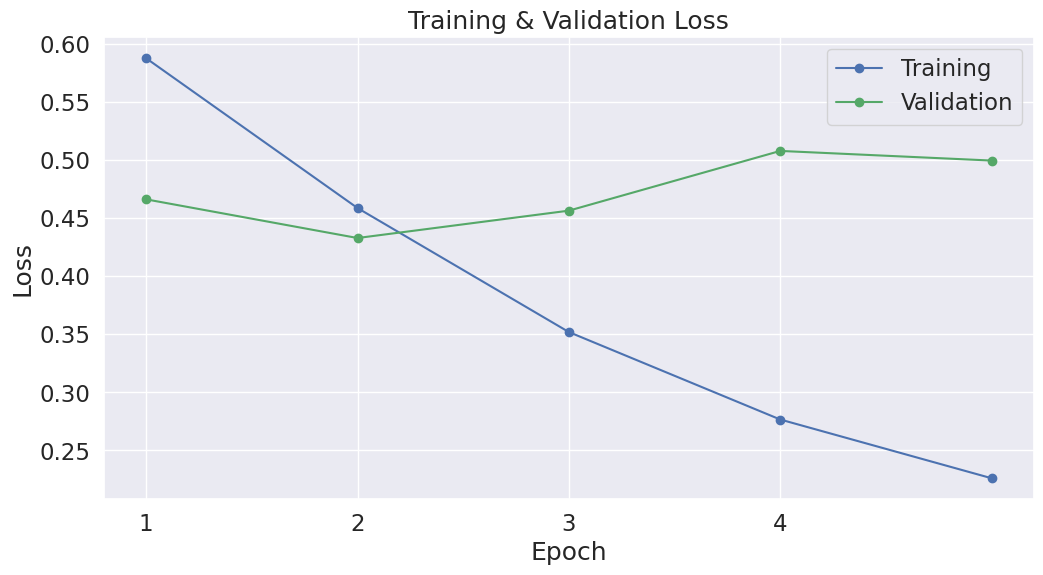

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

In [67]:
import pandas as pd

# Load the dataset into a pandas dataframe.
df = test_df
# Report the number of sentences.
print('Number of test sentences: {:,}\n'.format(df.shape[0]))

# Create sentence and label lists
sentences = df.sentence.values
labels = df.label.values

# Get the lists of sentences and their labels.

sentences = df.sentence.values
labels = df.label.values

# Create lists to store valid sentences and corresponding labels
cleaned_sentences = []
cleaned_labels = []

# Remove NaN sentences and corresponding labels
for sent, label in zip(sentences, labels):
    if isinstance(sent, str):
        cleaned_sentences.append(sent)
        cleaned_labels.append(label)

# Convert lists to numpy arrays
# cleaned_sentences = np.array(cleaned_sentences)
# cleaned_labels = np.array(cleaned_labels)

sentences = cleaned_sentences
labels = cleaned_labels

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )

    # Add the encoded sentence to the list.
    input_ids.append(encoded_dict['input_ids'])

    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Set the batch size.
batch_size = 32

# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

Number of test sentences: 919



/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2688: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [68]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables
predictions , true_labels = [], []

# Predict
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)

  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch

  # Telling the model not to compute or store gradients, saving memory and
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions.
      result = model(b_input_ids,
                     token_type_ids=None,
                     attention_mask=b_input_mask,
                     return_dict=True)

  logits = result.logits

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()

  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 919 test sentences...
    DONE.


In [69]:
print('Positive samples: %d of %d (%.2f%%)' % (df.label.sum(), len(df.label), (df.label.sum() / len(df.label) * 100.0)))

Positive samples: 622 of 919 (67.68%)


In [70]:
from sklearn.metrics import matthews_corrcoef

matthews_set = []

# Evaluate each test batch using Matthew's correlation coefficient
print('Calculating Matthews Corr. Coef. for each batch...')

# For each input batch...
for i in range(len(true_labels)):

  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()

  # Calculate and store the coef for this batch.
  matthews = matthews_corrcoef(true_labels[i], pred_labels_i)
  matthews_set.append(matthews)

Calculating Matthews Corr. Coef. for each batch...


/tmp/ipykernel_34/2646804597.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=list(range(len(matthews_set))), y=matthews_set, ci=None)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


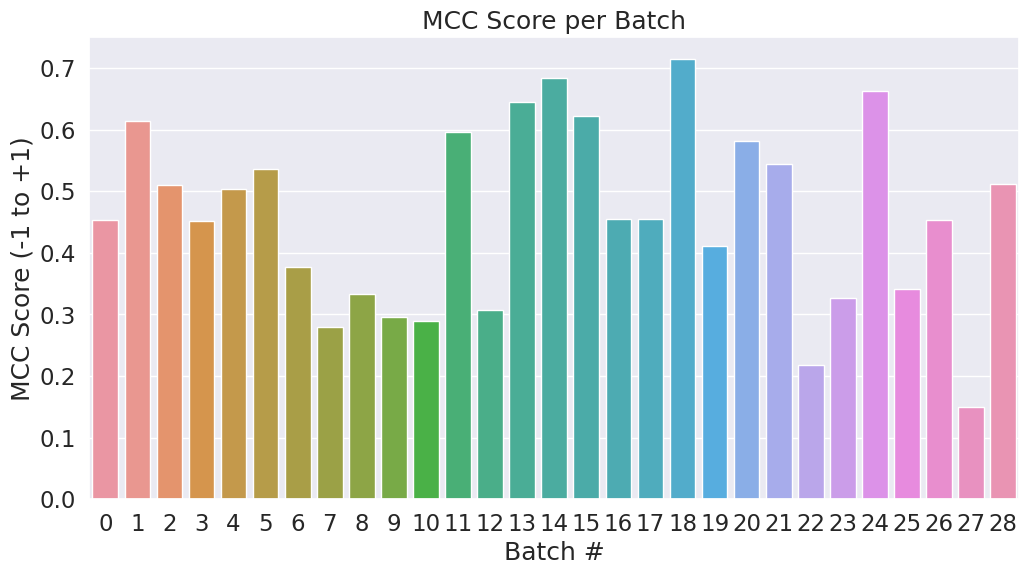

In [71]:
# Create a barplot showing the MCC score for each batch of test samples.
ax = sns.barplot(x=list(range(len(matthews_set))), y=matthews_set, ci=None)

plt.title('MCC Score per Batch')
plt.ylabel('MCC Score (-1 to +1)')
plt.xlabel('Batch #')

plt.show()

In [72]:
# Combine the results across all batches.
flat_predictions = np.concatenate(predictions, axis=0)

# For each sample, pick the label (0 or 1) with the higher score.
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = np.concatenate(true_labels, axis=0)

# Calculate the MCC
mcc = matthews_corrcoef(flat_true_labels, flat_predictions)

print('Total MCC: %.3f' % mcc)

Total MCC: 0.460


In [73]:
from sklearn.metrics import f1_score

# Calculate the F1 score
f1 = f1_score(flat_true_labels, flat_predictions)

print('F1 Score: %.3f' % f1)

F1 Score: 0.837


In [74]:
from sklearn.metrics import classification_report

target_names = ['class A', 'class B']
print(classification_report(flat_true_labels, flat_predictions, target_names=target_names))

              precision    recall  f1-score   support

     class A       0.67      0.57      0.62       297
     class B       0.81      0.87      0.84       622

    accuracy                           0.77       919
   macro avg       0.74      0.72      0.73       919
weighted avg       0.76      0.77      0.77       919



In [75]:
import os

# Saving best-practices: if you use defaults names for the model, you can reload it using from_pretrained()

output_dir = './model_save'

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)


model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)


Saving model to ./model_save


('./model_save/tokenizer_config.json',
 './model_save/special_tokens_map.json',
 './model_save/vocab.txt',
 './model_save/added_tokens.json')

In [76]:
!ls -l --block-size=K ./model_save/

total 654636K
-rw-r--r-- 1 root root      1K Apr 15 05:24 config.json
-rw-r--r-- 1 root root 653765K Apr 15 05:24 model.safetensors
-rw-r--r-- 1 root root      1K Apr 15 05:24 special_tokens_map.json
-rw-r--r-- 1 root root      2K Apr 15 05:24 tokenizer_config.json
-rw-r--r-- 1 root root    852K Apr 15 05:24 vocab.txt
